# Sentinel-2 L2A Analytic (GeoTIFF)
This notebook provides details on how to access Sentinel-2 data (L2A pre-processing or Bottom Of Atmosphere (BOA) reflectance images) with 13 bands. The 13 bands include 4 visible bands (10 m resolution), 6 Near-Infrared bands (20 m resolution), and 3 Short-Wave Infrared bands (60 m resolution). The Sentinel-2 mission is a land monitoring constellation of two satellites that provide high resolution optical imagery and provide continuity for the current SPOT and Landsat missions. The mission provides a global coverage of the Earth's land surface every 5 days, making the data of great use in on-going studies.Important application areas for Sentinel-2 imagery are: land cover monitoring (agriculture, forestry), coastal area monitoring, inland water monitoring, glacier monitoring and flood mapping.
Sentinel-2 Level-2A products have been available over Europe since March 2018, and later extended gloablly as of December 2018.

In the example, the workflow, the area of interest and the workflow parameters are defined. After running the job, the results are downloaded and visualized. For more information, refer to the block's [UP42 Marketplace page](https://marketplace.up42.com/block/e13d8e92-2763-4640-80d6-1501b2729707) and [Documentation](https://docs.up42.com/up42-blocks/data/esa-s2-l2a-gtiff-analytic.html).

In [2]:
import up42

import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Authenticate user and initialise project.
up42.authenticate(project_id="1234", 
                  project_api_key="5678")
project = up42.initialize_project()

2021-03-26 14:39:24,521 - Authentication with UP42 successful!
2021-03-26 14:39:25,664 - Initialized Project(name: S2l2a-Analytics-data-example, project_id: 1f2bad99-daad-4a60-9192-5169263caff6, description: , createdAt: 2021-03-18T14:39:08.255254Z)


In [4]:
# Define the aoi
aoi = {"type": "FeatureCollection","features": [{"type": "Feature","properties": {},
    "geometry": {"type": "Polygon","coordinates": [[[14.610298,-24.516841],
                                                    [14.622478,-24.516841],
                                                    [14.622478,-24.50833],
                                                    [14.610298,-24.50833],
                                                    [14.610298,-24.516841]]]}}]}

In [5]:
# Construct the workflow.
workflow = project.create_workflow(name="Sentinel2-l2-analytic-example", use_existing=True)
input_tasks = ["Sentinel-2 L2A Analytic (GeoTIFF)"]
workflow.add_workflow_tasks(input_tasks)

2021-03-26 14:39:25,686 - Getting existing workflows in project ...
2021-03-26 14:39:26,185 - Got 2 workflows for project 1f2bad99-daad-4a60-9192-5169263caff6.
100%|██████████| 2/2 [00:01<00:00,  1.86it/s]
2021-03-26 14:39:27,271 - Using existing workflow: Sentinel2-l2-analytic-example - 00e94c32-7cfe-40b8-85b6-cc2ffa980c75
2021-03-26 14:39:30,984 - Added tasks to workflow: [{'name': 'esa-s2-l2a-gtiff-analytic:1', 'parentName': None, 'blockId': 'e13d8e92-2763-4640-80d6-1501b2729707'}]


In [6]:
# Define the aoi and input parameters of the workflow to run it.
input_parameters = workflow.construct_parameters(geometry=aoi, 
                                                 geometry_operation='intersects', 
                                                 start_date="2018-11-07", 
                                                 end_date="2020-12-31",
                                                 limit=1)
input_parameters["esa-s2-l2a-gtiff-analytic:1"].update({"max_cloud_cover":10})

In [7]:
# Price Estimation.
workflow.estimate_job(input_parameters)

2021-03-26 14:39:39,820 - Estimated: 1-1 Credits, Duration: 0-0 min.


{'esa-s2-l2a-gtiff-analytic:1': {'blockConsumption': {'resources': {'unit': 'SQUARE_KM',
    'min': 0,
    'max': 0},
   'credit': {'min': 0, 'max': 0}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}}}

In [8]:
# Run test job to query data availability and check the configuration.
test_job = workflow.test_job(input_parameters, track_status=True)

2021-03-26 14:39:39,835 - +++++++++++++++++++++++++++++++++
2021-03-26 14:39:39,836 - Running this job as Test Query...
2021-03-26 14:39:39,837 - +++++++++++++++++++++++++++++++++
2021-03-26 14:39:39,838 - Selected input_parameters: {'esa-s2-l2a-gtiff-analytic:1': {'time': '2018-11-07T00:00:00Z/2020-12-31T23:59:59Z', 'limit': 1, 'max_cloud_cover': 10, 'intersects': {'type': 'Polygon', 'coordinates': (((14.610298, -24.516841), (14.622478, -24.516841), (14.622478, -24.50833), (14.610298, -24.50833), (14.610298, -24.516841)),)}}, 'config': {'mode': 'DRY_RUN'}}
2021-03-26 14:41:55,500 - Created and running new job: 62a1a4d8-d05a-4d11-b2c5-c36cbcc8ac71.
2021-03-26 14:41:56,168 - Tracking job status continuously, reporting every 30 seconds...
2021-03-26 14:42:19,774 - Job finished successfully! - 62a1a4d8-d05a-4d11-b2c5-c36cbcc8ac71


In [9]:
# Run actual Job.
job = workflow.run_job(input_parameters, track_status=True)

2021-03-26 14:42:24,789 - Selected input_parameters: {'esa-s2-l2a-gtiff-analytic:1': {'time': '2018-11-07T00:00:00Z/2020-12-31T23:59:59Z', 'limit': 1, 'max_cloud_cover': 10, 'intersects': {'type': 'Polygon', 'coordinates': (((14.610298, -24.516841), (14.622478, -24.516841), (14.622478, -24.50833), (14.610298, -24.50833), (14.610298, -24.516841)),)}}}
2021-03-26 14:42:29,390 - Created and running new job: ac01ba64-5610-424c-8a7e-933c511a2f7c.
2021-03-26 14:42:29,881 - Tracking job status continuously, reporting every 30 seconds...
2021-03-26 14:43:04,487 - Job is PENDING! - ac01ba64-5610-424c-8a7e-933c511a2f7c
2021-03-26 14:43:38,533 - Job is RUNNING! - ac01ba64-5610-424c-8a7e-933c511a2f7c
2021-03-26 14:44:12,538 - Job is RUNNING! - ac01ba64-5610-424c-8a7e-933c511a2f7c
2021-03-26 14:44:46,415 - Job is RUNNING! - ac01ba64-5610-424c-8a7e-933c511a2f7c
2021-03-26 14:45:14,293 - Job finished successfully! - ac01ba64-5610-424c-8a7e-933c511a2f7c


In [ ]:
# Downlod Results.
job.download_results()

### Visualize the RGB bands
This block delivers each band image as a single file, `job.plot_results()` does not yet cover this case. We will visualize the RGB bands manually, also see this [tutorial](https://automating-gis-processes.github.io/site/notebooks/Raster/plotting-raster.html).

In [11]:
# Identify the RGB bands.
red = 'project_1f2bad99-daad-4a60-9192-5169263caff6/job_01bdf71e-7c35-4454-844b-809900bcef64/S2B_33JVN_20201215_0_L2A_B04.tif'
green = 'project_1f2bad99-daad-4a60-9192-5169263caff6/job_01bdf71e-7c35-4454-844b-809900bcef64/S2B_33JVN_20201215_0_L2A_B03.tif'
blue = 'project_1f2bad99-daad-4a60-9192-5169263caff6/job_01bdf71e-7c35-4454-844b-809900bcef64/S2B_33JVN_20201215_0_L2A_B02.tif'
file_list = [red, green, blue]

In [13]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

In [14]:
rgb = []
for file in file_list:
    with rasterio.open(file) as src:
        rgb.append(normalize(src.read(1)))
rgb = np.dstack(rgb)

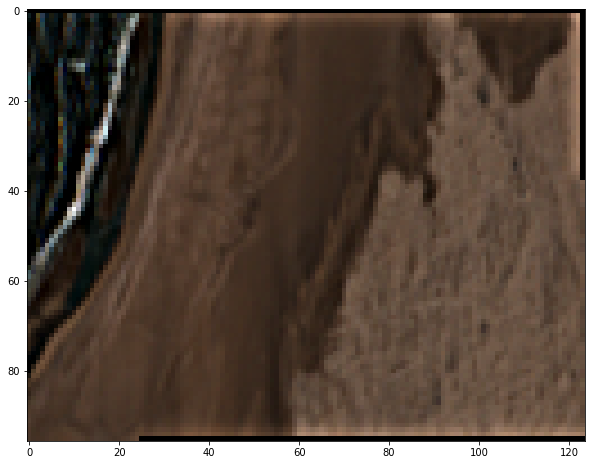

In [16]:
# Plot the results.
plt.figure(figsize=(10,10))
plt.imshow(rgb)